In [2]:
import pandas as pd
df = pd.read_csv('/home/zam21003/tweets_collected_by_chiman/chindi_tweets.csv')

In [7]:
small_sample = df[0:20]['text']

In [8]:
small_sample

0     @BJP4India @narendramodi @kpmaurya1 \n@SwamiPM...
1     पांडे जी कैसे सर्वोच्च होगा आज के समय में सबसे...
2     @SampatOfficial @Profdilipmandal Sampat तुम तो...
3     उसकी स्थापना करने वाला सुल्तान (राजा) ब्राह्मण...
4     ब्राह्मण सन सुलतान॥\nसतगुरू नानक देव जी ने चार...
5     जम्मू-कश्मीर के पुंछ में कायरतापूर्ण आतंकी हमल...
6     @ahmed96150511 @Sanjay4796 @safiyanaaj हे महाज...
7     @RahulGandhi २००४ से २०१४ तो कोंग्रेस कि सरकार...
8     तेली पिछड़ा वैश्य महासभा द्वारा बूंदी (हाड़ौती...
9     @NarpatRath80790 इसलिए तो हम ब्रभण का सम्मान क...
10    @HansrajMeena पूरे देश में दलित आदिवासी समाज क...
11    @jitendrasaroj41 @SureshChavhanke भीम हो या अर...
12    झारखंड। लातेहार। चंदवा प्रखंड के हाका गांव पहु...
13    @abhinav_blogger लेकिन बहुत से बहुजन एक्टिविस्...
14    @askrajeshsahu चीन की तरह , , एक परिवार एक बच्...
15    @PMOIndia लगता है मोदीजी डरे हुये है क्योंकि द...
16    भैंस का घंटा\n370, 35A, पुलवामा, तीन तलाक़,लव ...
17    ओबीसी आरक्षण वीपी सिंह (ठाकुर)ने दिया,\n2.

In [9]:
small_sample.to_csv('tweets_to_gpt.csv', index=False) 

In [28]:
test_claim = pd.read_csv('chatgpt_claims.csv')

In [50]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy


# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')





/home/zam21003/Anaconda/envs/cross_lingual/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [54]:

def custom_function(input1, input2):
    sentences = [input1, input2]
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    output = util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[1])
    return output

In [55]:

test_claim['tweet_english_claim'] = test_claim.apply(lambda row: custom_function(row['text'], row['English_claims']), axis=1)
test_claim['tweet_english_text'] = test_claim.apply(lambda row: custom_function(row['text'], row['English']), axis=1)
test_claim['tweet_hindi_claim'] = test_claim.apply(lambda row: custom_function(row['text'], row['Hindi_claims']), axis=1)
test_claim['tweet_gujarati_claim'] = test_claim.apply(lambda row: custom_function(row['text'], row['Gujrati_claims']), axis=1)
test_claim['english_hindi_claim'] = test_claim.apply(lambda row: custom_function(row['Hindi_claims'], row['English_claims']), axis=1)
test_claim['hindi_gujarati_claim'] = test_claim.apply(lambda row: custom_function(row['Hindi_claims'], row['Gujrati_claims']), axis=1)
test_claim['english_gujrati_claim'] = test_claim.apply(lambda row: custom_function(row['Gujrati_claims'], row['English_claims']), axis=1)

In [44]:
test_claim

,text,English,English_claims,Hindi_claims,Gujrati_claims,tweet_english_claim,tweet_english_text,tweet_hindi_claim,tweet_gujarati_claim,english_hindi_claim,hindi_gujarati_claim,english_gujrati_claim
0,@BJP4India @narendramodi @kpmaurya1 \n@SwamiPM...,"""@BJP4India @narendramodi @kpmaurya1\n@SwamiPM...",The claim is that there is an assertion about ...,दावा है कि राष्ट्र की योद्धा वर्ग को अपना इतिह...,અંગેની દાવો કરે છે કે રાષ્ટ્રના યોદ્ધા વર્ગો પ...,[[tensor(0.4071)]],[[tensor(0.7311)]],[[tensor(0.4654)]],[[tensor(0.1986)]],[[tensor(0.7877)]],[[tensor(0.1689)]],[[tensor(0.1616)]]
1,पांडे जी कैसे सर्वोच्च होगा आज के समय में सबसे...,"""How will the Pandit become supreme in today's...",This claim suggests that Brahmins are currentl...,इस दावे में कहा गया है कि वर्तमान समय में ब्रा...,આ દાવોમાં કહેવાયું છે કે આજની સમયે બ્રાહ્મણો ન...,[[tensor(0.6062)]],[[tensor(0.7062)]],[[tensor(0.7282)]],[[tensor(0.1820)]],[[tensor(0.8176)]],[[tensor(0.1786)]],[[tensor(0.1246)]]
2,@SampatOfficial @Profdilipmandal Sampat तुम तो...,"@SampatOfficial @Profdilipmandal Sampat, you a...",The claim here is about questioning the basis ...,यह दावा ब्रह्मणों के बीच गर्व के मूल्यांकन की ...,આ દાવો બ્રહ્મણો માં ઘર્વો અને તેમના જાતિઆધારિત...,[[tensor(0.5161)]],[[tensor(0.7264)]],[[tensor(0.4671)]],[[tensor(0.4350)]],[[tensor(0.6723)]],[[tensor(0.5219)]],[[tensor(0.4086)]]
3,उसकी स्थापना करने वाला सुल्तान (राजा) ब्राह्मण...,The Sultan (king) who established it was a Bra...,This claim discusses the historical aspect of ...,"इसमें ब्राह्मण की भूमिका का वर्णन है, जिसमें क...","આમંત્રિત પ્રસંગે બ્રાહ્મણ ભૂમિકાનું વર્ણન છે, ...",[[tensor(0.4992)]],[[tensor(0.8086)]],[[tensor(0.4795)]],[[tensor(0.3897)]],[[tensor(0.8562)]],[[tensor(0.4681)]],[[tensor(0.4232)]]
4,ब्राह्मण सन सुलतान॥\nसतगुरू नानक देव जी ने चार...,"Brahman Sun Sultan.'\nSatguru Nanak Dev Ji, wh...",It suggests a religious interpretation wherein...,यह दावा एक धार्मिक व्याख्यान के बारे में है जि...,"આ દાવો ધાર્મિક ટેક્સટ પર આધારિત છે, જેમાં હિંદ...",[[tensor(0.5263)]],[[tensor(0.8209)]],[[tensor(0.5534)]],[[tensor(0.5288)]],[[tensor(0.8335)]],[[tensor(0.6339)]],[[tensor(0.5917)]]
5,जम्मू-कश्मीर के पुंछ में कायरतापूर्ण आतंकी हमल...,"""Homage to the brave soldiers of the army who ...",The claim here is to pay homage to soldiers ma...,यह दावा शहीदों को श्रद्धांजलि अर्पित करने के ल...,આ દાવો શહીદોને શ્રદ્ધાંજલિ અર્પણ કરવા માટે છે.,[[tensor(0.3710)]],[[tensor(0.7644)]],[[tensor(0.3316)]],[[tensor(0.2970)]],[[tensor(0.8078)]],[[tensor(0.7175)]],[[tensor(0.5947)]]
6,@ahmed96150511 @Sanjay4796 @safiyanaaj हे महाज...,@ahmed96150511 @Sanjay4796 @safiyanaaj Hey wis...,This claim refutes the notion that Hindu scrip...,इस दावे में हिन्दू शास्त्रों में दलितों के प्र...,આ દાવેમાં હિંદૂ શાસ્ત્રોમાં દલિતો પર જાતિવાદી ...,[[tensor(0.4447)]],[[tensor(0.7064)]],[[tensor(0.5381)]],[[tensor(0.3853)]],[[tensor(0.8648)]],[[tensor(0.4826)]],[[tensor(0.3881)]]
7,@RahulGandhi २००४ से २०१४ तो कोंग्रेस कि सरकार...,"@RahulGandhi From 2004 to 2014, there was a Co...",The claim here criticizes Rahul Gandhi for not...,"यह दावा राहुल गांधी को ब्राह्मण, ओबीसी और आदिव...","આ દાવેમાં રાહુલ ગાંધીને બ્રાહ્મણ, ઓબીસી અને આદ...",[[tensor(0.6363)]],[[tensor(0.8148)]],[[tensor(0.5761)]],[[tensor(0.5406)]],[[tensor(0.7928)]],[[tensor(0.6492)]],[[tensor(0.5232)]]
8,तेली पिछड़ा वैश्य महासभा द्वारा बूंदी (हाड़ौती...,"""Meeting called by the Teli Pichhada Vaishya M...",This claim discusses a meeting organized by a ...,इसमें एक बौद्धिक संगठन के विचार के बारे में है...,આ દાવો આરક્ષણ અને સમાજના વિવિધ વર્ગો વચ્ચેની સ...,[[tensor(0.5082)]],[[tensor(0.7487)]],[[tensor(0.5497)]],[[tensor(0.3834)]],[[tensor(0.7627)]],[[tensor(0.3402)]],[[tensor(0.3440)]]
9,@NarpatRath80790 इसलिए तो हम ब्रभण का सम्मान क...,"""@NarpatRath80790 That's why we honor the Brah...",It praises Brahmins for their historical role ...,"इसमें ब्राह्मणों की प्रशंसा की गई है, उनके ऐति...",આ દાવો બ્રાહ્મણ સમુદાયને માન્યતા આપતું છે કે ત...,[[tensor(0.2054)]],[[tensor(0.5796)]],[[tensor(0.2635)]

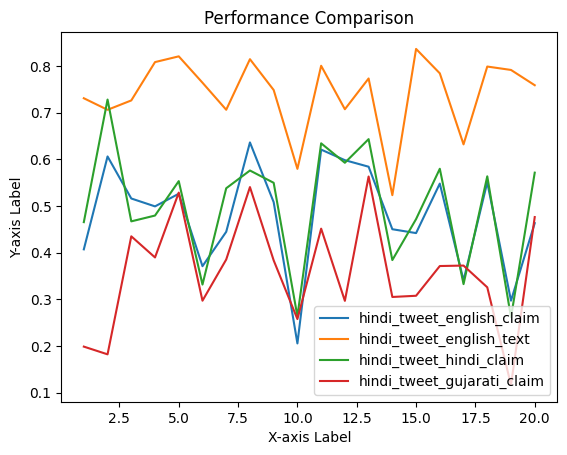

In [67]:
import matplotlib.pyplot as plt



# X-axis values (e.g., time points)
x_values = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# Plotting each list as a separate line
plt.plot(x_values, text_claim_list, label='hindi_tweet_english_claim')
plt.plot(x_values, tweet_english_text_list, label='hindi_tweet_english_text')
plt.plot(x_values, tweet_hindi_claim_list, label='hindi_tweet_hindi_claim')
plt.plot(x_values, tweet_gujarati_claim_list, label='hindi_tweet_gujarati_claim')

# Adding labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Performance Comparison')
plt.legend()

In [57]:
def tensor_numerical(a_list):
    new_list = []
    for i in a_list:
        new_value = i.cpu().numpy()[0][0]
        
        new_list.append(new_value)
    return new_list

In [66]:
text_claim_list =  tensor_numerical(test_claim['tweet_english_claim'])
tweet_english_text_list = tensor_numerical(test_claim['tweet_english_text'])
tweet_hindi_claim_list = tensor_numerical(test_claim['tweet_hindi_claim'])
tweet_gujarati_claim_list = tensor_numerical(test_claim['tweet_gujarati_claim'])

In [69]:
english_hindi_claim_list =  tensor_numerical(test_claim['english_hindi_claim'])
hindi_gujarati_claim_list = tensor_numerical(test_claim['hindi_gujarati_claim'])
english_gujarati_claim_list = tensor_numerical(test_claim['english_gujrati_claim'])

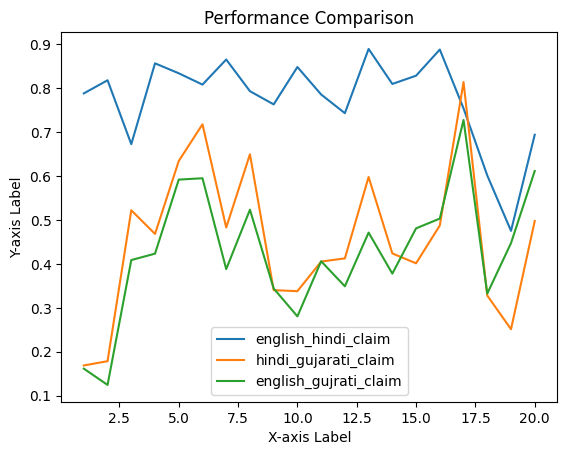

In [70]:
import matplotlib.pyplot as plt



# X-axis values (e.g., time points)
x_values = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# Plotting each list as a separate line
plt.plot(x_values, english_hindi_claim_list, label='english_hindi_claim')
plt.plot(x_values, hindi_gujarati_claim_list, label='hindi_gujarati_claim')
plt.plot(x_values, english_gujarati_claim_list, label='english_gujrati_claim')


# Adding labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Performance Comparison')
plt.legend()